<a href="https://colab.research.google.com/github/MPutraWibisono/Posttest-2_Data-Mining/blob/main/045_B1_Muhammad%20Putra%20Wibisono_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [2]:
import pandas as pd

df = pd.read_csv('dataset_market_basket.txt')

In [3]:
with open('dataset_market_basket.txt') as file:
  raw_data =file.read()

raw_data

'whole milk,pastry,salty snack\nsausage,whole milk,semi-finished bread,yogurt\nsoda,pickled vegetables\ncanned beer,misc. beverages\nsausage,hygiene articles\nsausage,whole milk,rolls/buns\nwhole milk,soda\nfrankfurter,soda,whipped/sour cream\nfrankfurter,curd\nbeef,white bread\nbutter,whole milk\nfrozen vegetables,other vegetables\ntropical fruit,sugar\nbutter milk,specialty chocolate\nfrozen meals,dental care\nrolls/buns,rolls/buns\nroot vegetables,detergent\nsausage,rolls/buns\ndish cleaner,cling film/bags'

In [4]:
data = raw_data.split("\n")
data

['whole milk,pastry,salty snack',
 'sausage,whole milk,semi-finished bread,yogurt',
 'soda,pickled vegetables',
 'canned beer,misc. beverages',
 'sausage,hygiene articles',
 'sausage,whole milk,rolls/buns',
 'whole milk,soda',
 'frankfurter,soda,whipped/sour cream',
 'frankfurter,curd',
 'beef,white bread',
 'butter,whole milk',
 'frozen vegetables,other vegetables',
 'tropical fruit,sugar',
 'butter milk,specialty chocolate',
 'frozen meals,dental care',
 'rolls/buns,rolls/buns',
 'root vegetables,detergent',
 'sausage,rolls/buns',
 'dish cleaner,cling film/bags']

In [5]:
transactions = [item.split(",") for item in data]
transactions

#jumlah transaksi = 19
# len(transactions)

#jumlah pembelian item = 43
# j = 0
# for i in range(len(transactions)):
#   j += len(transactions[i])
# j

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['frozen vegetables', 'other vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags']]

In [6]:
# Daftar item unik
unique_items = []

for transaction in transactions:
    for item in transaction:
        if item not in unique_items:
            unique_items.append(item)

unique_items

['whole milk',
 'pastry',
 'salty snack',
 'sausage',
 'semi-finished bread',
 'yogurt',
 'soda',
 'pickled vegetables',
 'canned beer',
 'misc. beverages',
 'hygiene articles',
 'rolls/buns',
 'frankfurter',
 'whipped/sour cream',
 'curd',
 'beef',
 'white bread',
 'butter',
 'frozen vegetables',
 'other vegetables',
 'tropical fruit',
 'sugar',
 'butter milk',
 'specialty chocolate',
 'frozen meals',
 'dental care',
 'root vegetables',
 'detergent',
 'dish cleaner',
 'cling film/bags']

In [7]:
len(unique_items)

30

## Tabel Tabulasi Versi Txt

In [8]:
# Membuat tabel tabulasi
table = []
for transaction in transactions:
    row = []
    for item in unique_items:
        if item in transaction:
            row.append(1)
        else:
            row.append(0)
    table.append(row)

# 2 rolls/buns pada transaksi ke 16
table[15][11] = 2

# Mencetak tabel tabulasi
for i in range(len(transactions)):
  if i == 0:
    list1 = list(range(1, 10)) + [0]
    list2 = list1 * 3
    print('Item Dataset :', list2, '\n')
  elif i > 8:
    print("Transaksi", i+1, ":", table[i])
    continue  
  print("Transaksi ", i+1, ":", table[i])

Item Dataset : [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0] 

Transaksi  1 : [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Transaksi  2 : [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Transaksi  3 : [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Transaksi  4 : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Transaksi  5 : [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Transaksi  6 : [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Transaksi  7 : [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Transaksi  8 : [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Transaksi  9 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## Tabel Tabulasi Versi Excel

In [9]:
  df1 = pd.read_excel('posttest2.xlsx')
  df1

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Membuat daftar support dan confidence

In [10]:
# Menghitung jumlah total transaksi (N=19)
N = len(df1.index)

# Menentukan 2 item set yang ingin dianalisis
processed_pairs = set()
for i in range(len(df1.columns)):
      for y in range(len(df1.columns)):
        # mengambil itemset dari dua baris yang berbeda
        itemset1 = df1.columns[i]
        itemset2 = df1.columns[y]
        
        # mengecek apakah itemset1 dan itemset2 tidak sama dan belum pernah diproses sebelumnya
        if itemset1 != itemset2 and (itemset1, itemset2) not in processed_pairs:
            # menambahkan pasangan itemset ke daftar yang telah diproses
            processed_pairs.add((itemset1, itemset2))

            # Menghitung jumlah transaksi yang mengandung kedua item tersebut (n)
            n = ((df1[itemset1] == 1) & (df1[itemset2] == 1)).sum()
            # Menghitung support untuk 2 item set
            supp = (n / N)*100
            support = "{:.2f}".format(supp) 

            # Menghitung jumlah transaksi yang mengandung item pertama (item1) saja (n1)
            n1 = (df1[itemset1] == 1).sum() + (df1[itemset1] == 2).sum()

            # Menghitung confidence untuk aturan asosiasi (item1 -> item2)
            conf = (n / n1)*100
            confidence = "{:.2f}".format(conf)

            # Menampilkan hasil support dan confidence
            if (support != '0.00') and (confidence != '0.00'): # <==== selektor untuk menghilangkan hasil yang 0%
              if len(itemset1)+len(itemset2) < 16:
                print(f"[{itemset1}] -> [{itemset2}]\t\t\t\tSupport {support}%\t\tConfidence {confidence}%")
              elif len(itemset1)+len(itemset2) > 32:
                print(f"[{itemset1}] -> [{itemset2}]\tSupport {support}%\t\tConfidence {confidence}%")
              elif len(itemset1)+len(itemset2) > 23 :
                print(f"[{itemset1}] -> [{itemset2}]\t\tSupport {support}%\t\tConfidence {confidence}%")
              else:
                print(f"[{itemset1}] -> [{itemset2}]\t\t\tSupport {support}%\t\tConfidence {confidence}%")

[whole milk] -> [pastry]			Support 5.26%		Confidence 20.00%
[whole milk] -> [salty snack]			Support 5.26%		Confidence 20.00%
[whole milk] -> [sausage]			Support 10.53%		Confidence 40.00%
[whole milk] -> [semi-finished bread]		Support 5.26%		Confidence 20.00%
[whole milk] -> [yogurt]			Support 5.26%		Confidence 20.00%
[whole milk] -> [soda]				Support 5.26%		Confidence 20.00%
[whole milk] -> [rolls/buns]			Support 5.26%		Confidence 20.00%
[whole milk] -> [butter]			Support 5.26%		Confidence 20.00%
[pastry] -> [whole milk]			Support 5.26%		Confidence 100.00%
[pastry] -> [salty snack]			Support 5.26%		Confidence 100.00%
[salty snack] -> [whole milk]			Support 5.26%		Confidence 100.00%
[salty snack] -> [pastry]			Support 5.26%		Confidence 100.00%
[sausage] -> [whole milk]			Support 10.53%		Confidence 50.00%
[sausage] -> [semi-finished bread]		Support 5.26%		Confidence 25.00%
[sausage] -> [yogurt]				Support 5.26%		Confidence 25.00%
[sausage] -> [hygiene articles]			Support 5.26%		Confidenc

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

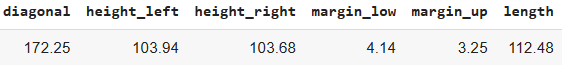
<!-- 1412 -->

In [11]:
import pandas as pd
import numpy as np

df2 = pd.read_csv("deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [12]:
# Memisahkan fitur dan target
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
df2['Jarak'] = distances

# Menyimpan hasil ke file CSV
df2.to_csv('deteksi_uang_palsu_jarak.csv', index=False)

In [13]:
# hasil file csv dari penambahan kolom jarak
df_jarak = pd.read_csv('deteksi_uang_palsu_jarak.csv')
df_jarak

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [14]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# Membaca dataset dari file CSV
df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

# Mengambil K jarak terdekat
K = int(np.sqrt(len(df)))
indices = np.argsort(distances)[:K]

# Mengurutkan data berdasarkan K jarak terdekat
df_sorted = df.iloc[indices].reset_index(drop=True)

# Menyimpan hasil ke file CSV
df_sorted.to_csv('deteksi_uang_palsu_sorted.csv', index=False)

In [15]:
# hasil file csv dari penambahan kolom jarak
df_sorted = pd.read_csv('deteksi_uang_palsu_sorted.csv')
df_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.00,104.23,104.52,5.76,3.37,110.94
1,False,172.11,104.14,104.15,4.84,3.28,110.98
2,False,171.84,104.06,104.10,4.87,3.25,111.04


In [16]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Load dataset
df = pd.read_csv("deteksi_uang_palsu.csv")

# Hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

# Tampilkan label terbanyak
print("Label terbanyak adalah", label_counts.idxmax())

Label terbanyak adalah True


# (3) Analisis

> Nama : Muhammad Putra Wibisono

> Nim : 2109116045


Penjelasan posttest : 

Tema :  **Pendidkan**

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## a. Business Understanding

Kolom pada dataset `spmb2022_0_formasi_polstatstis.csv` dapat dijelaskan sebagai berikut:

1. Kode Wilayah: Kode yang digunakan untuk mengidentifikasi wilayah yang diwakili dalam dataset.

2. Kode Formasi: Kode yang digunakan untuk mengidentifikasi formasi yang tersedia di suatu wilayah pada tahun 2022.

3. Lokasi Formasi: Informasi mengenai lokasi formasi pada wilayah yang bersangkutan.

4. Formasi D3ST: Jumlah formasi yang tersedia untuk program studi Diploma III (D3) pada wilayah tersebut.

5. Pendaftar D3ST: Jumlah pendaftar yang mendaftar pada program studi Diploma III (D3) pada wilayah tersebut.

6. Formasi D4ST: Jumlah formasi yang tersedia untuk program studi Diploma IV (D4) pada wilayah tersebut.

7. Pendaftar D4ST: Jumlah pendaftar yang mendaftar pada program studi Diploma IV (D4) pada wilayah tersebut.

8. Formasi D4KS: Jumlah formasi yang tersedia untuk program studi Diploma IV (D4) dengan kebutuhan khusus pada wilayah tersebut.

9. Pendaftar D4KS: Jumlah pendaftar yang mendaftar pada program studi Diploma IV (D4) dengan kebutuhan khusus pada wilayah tersebut.

10. Formasi Total: Jumlah total formasi yang tersedia pada wilayah tersebut, termasuk formasi D3ST, D4ST, dan D4KS.

Dalam dataset tersebut, kolom-kolom tersebut digunakan untuk menunjukkan jumlah formasi yang tersedia dan jumlah pendaftar yang mendaftar pada program studi D3, D4, dan D4KS di beberapa wilayah di Indonesia pada tahun 2022. Informasi ini dapat digunakan untuk mengambil keputusan terkait perencanaan jumlah formasi dan program studi yang akan ditawarkan pada tahun-tahun berikutnya.

Tujuan analisis ini adalah untuk memahami tren pendaftar di berbagai wilayah dan formasi sehingga dapat meningkatkan efektivitas rekrutmen karyawan.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Membaca dataset
df = pd.read_csv('spmb2022_0_formasi_polstatstis.csv')
df

,kode.wilayah,kode.formasi,lokasi.formasi,formasi.d3st,pendaftar.d3st,formasi.d4st,pendaftar.d4st,formasi.d4ks,pendaftar.d4ks,formasi.total
0,0,40160029,BPS Pusat,0,0,9,448,8,359,17
1,11,40160002,Provinsi Aceh,5,126,19,622,11,283,35
2,12,40160003,Provinsi Sumatera Utara,2,251,7,824,8,468,17
3,13,40160004,Provinsi Sumatera Barat,4,156,12,755,4,201,20
4,14,40160005,Provinsi Riau,3,89,13,508,0,0,16
5,15,40160006,Provinsi Jambi,2,64,13,496,4,121,19
6,16,40160007,Provinsi Sumatera Selatan,2,108,15,863,0,0,17
7,17,40160008,Provinsi Bengkulu,3,77,11,381,4,107,18
8,18,40160009,Provinsi Lampung,1,72,1,146,1,81,3
9,19,40160010,Provinsi Kepulauan Bangka Belitung,1,45,1,49,0,0,2


## b. Data Understanding

Mempelajari dan memahami data yang digunakan, termasuk mencari tahu bagaimana data tersebut diambil, bagaimana data tersebut diolah, serta bagaimana data tersebut dapat dipergunakan untuk menyelesaikan masalah bisnis yang dihadapi. Tujuannya adalah untuk memastikan data yang digunakan dalam proyek adalah data yang valid, akurat, dan representatif.

In [19]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.dtypes)
print(df.isna().sum())

(37, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   kode.wilayah    37 non-null     int64 
 1   kode.formasi    37 non-null     int64 
 2   lokasi.formasi  37 non-null     object
 3   formasi.d3st    37 non-null     int64 
 4   pendaftar.d3st  37 non-null     int64 
 5   formasi.d4st    37 non-null     int64 
 6   pendaftar.d4st  37 non-null     int64 
 7   formasi.d4ks    37 non-null     int64 
 8   pendaftar.d4ks  37 non-null     int64 
 9   formasi.total   37 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 3.0+ KB
None
       kode.wilayah  kode.formasi  formasi.d3st  pendaftar.d3st  formasi.d4st  \
count     37.000000  3.700000e+01     37.000000       37.000000     37.000000   
mean      48.594595  4.016002e+07      2.702703       73.837838      6.756757   
std       28.420903  1.082436e+01      2.093175       63.41070

## c. Data Preparation

Melakukan persiapan data, seperti membersihkan data dari data yang tidak diperlukan, mengisi missing value, dan melakukan transformasi data untuk mempersiapkan data untuk proses modeling. Tujuannya adalah untuk mendapatkan data yang berkualitas dan siap digunakan dalam proses modeling.

In [20]:
# menghilangkan missing value
df.dropna(inplace=True)

df['kode.wilayah'] = df['kode.wilayah'].astype('category')

# mempersiapkan data untuk modeling
X = df[['kode.wilayah', 'kode.formasi', 'formasi.d3st', 'formasi.d4st', 'formasi.d4ks']]
y = df['pendaftar.d4ks']

Berdasarkan kodingan yang telah disediakan di atas, dapat disimpulkan bahwa dataset yang digunakan dalam contoh tersebut berisi informasi tentang formasi dan pendaftar di beberapa wilayah yang mendaftar untuk pendidikan tinggi dalam beberapa program studi. Dataset ini berisi 10 variabel, yaitu kode wilayah, kode formasi, lokasi formasi, formasi d3st, pendaftar d3st, formasi d4st, pendaftar d4st, formasi d4ks, pendaftar d4ks, dan formasi total.

Dalam proses CRISP-DM, langkah-langkah yang dilakukan meliputi business understanding, data understanding, data preparation, modeling, evaluation, dan deployment. Pada tahap data understanding, dilakukan eksplorasi awal terhadap data untuk memahami karakteristiknya. Dalam hal ini, digunakan kodingan untuk menampilkan distribusi variabel dan korelasi antar variabel.

Dalam tahap data preparation, dilakukan proses cleaning dan preprocessing data sehingga data dapat digunakan dalam proses analisis lebih lanjut. Pada tahap ini, dilakukan penanganan data missing values dan data outliers. Data juga dipisahkan ke dalam training set dan test set untuk digunakan dalam tahap modeling

## Korelasi dan Distribusi Variabel

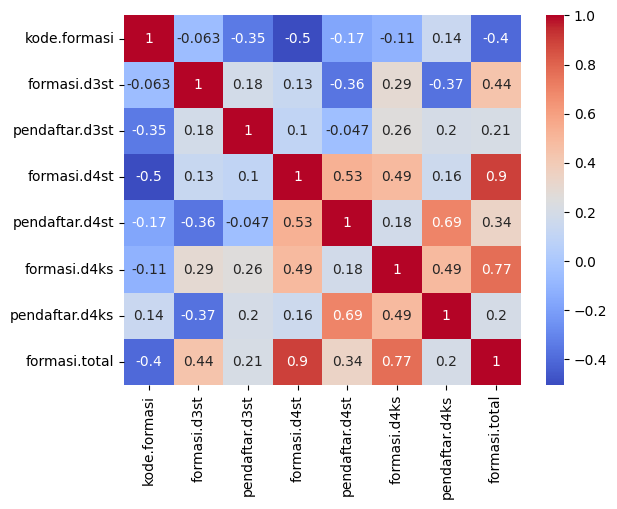

In [21]:
corr = df.corr()

# menampilkan heatmap korelasi
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

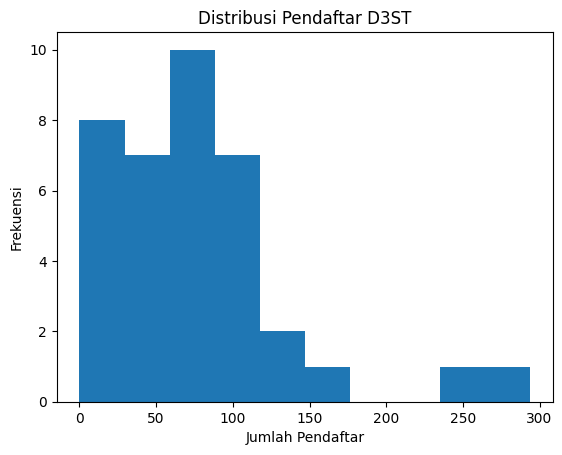

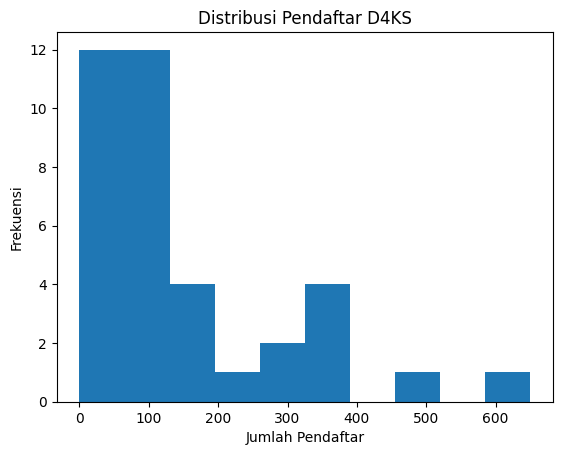

In [22]:
# menampilkan histogram dari variabel 'pendaftar_d3st'
plt.hist(df['pendaftar.d3st'], bins=10)
plt.title('Distribusi Pendaftar D3ST')
plt.xlabel('Jumlah Pendaftar')
plt.ylabel('Frekuensi')
plt.show()

# menampilkan histogram dari variabel 'pendaftar_d4ks'
plt.hist(df['pendaftar.d4ks'], bins=10)
plt.title('Distribusi Pendaftar D4KS')
plt.xlabel('Jumlah Pendaftar')
plt.ylabel('Frekuensi')
plt.show()
